# Diamonds Analysis

## Background and Motivation

There is a large amount of information about diamonds and many of there characteristics. Data sets usually have data about diamonds carat, cut, color, clarity, and price. The diamond data set from Kaggle also in clued an x, y, and z coordinate allowing for the calculation of a diamond volume. The data set from Kaggle was large with over 50,000 different diamonds varying in cut, carat, color, clarity, and price. This data set sparked interesting in what certain diamond characters affect other characters. In this project, I will be analyzing a data set of diamond to determine what characteristics affect the price the most, how each characteristic correlates with price. I also have a goal to great a function that will predict the price of a diamond given certain characteristics using regression. Regression analysis is a calculation taking known values to predict values. Regression equations are usually set up in the for y=beta0 + beta1*x + beta2*x...betan*x. 

## Methodology

The first step in answering my questions and goals was to import the data set. I used pandas to import the data, then separated the data set into its respective variables. I created a new variable, volume, what is a combination of the x, y, and z dimensions given in this data set. The formula to calculate the volume of a diamond is V=1/2(area*heght).

In [10]:
# addions to python
import pandas as pd
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [11]:
df = pd.read_csv('diamonds-2.csv') # imports data set of diamonds 

# seperates data set into inidval variable 
carat = df['carat']  # qant 
cut = df['cut'] # qualitative
color = df['color'] # qualitative
clarity = df['clarity'] # qualitative
price = df['price'] # price in USD qant
volume = 0.5*(df['x']*df['y']*df['z']) # qant




The next step in achieving my goals was to calculate averages and variances. I did this by using the .mean() and .var() function. I also printed the mean and variance using the print() function. 

In [3]:
Pm = price.mean()
Pv = price.var()
Vm = volume.mean()
Vv = volume.var()
Cm = carat.mean()
Cv = carat.var()


print('price avg in USD and variance',Pm, 'and',Pv)
print('carat avg and variance',Cm, 'and',Cv)
print('volume avg in mm^3 and variance',Vm, 'and',Vv)


price avg in USD and variance 3932.799721913237 and 15915629.424300838
carat avg and variance 0.7979397478679852 and 0.22468665982273753
volume avg in mm^3 and variance 64.92470166836162 and 1530.5802404010562


Next, I made box and whisker plots to display the effect of cut, clarity, and color on price. A box and whisker plot was used because cut and color are reported qualitatively. I imported seaborn as sns to use their boxplot function. 

Text(0.5, 1.0, 'clarity vs price')

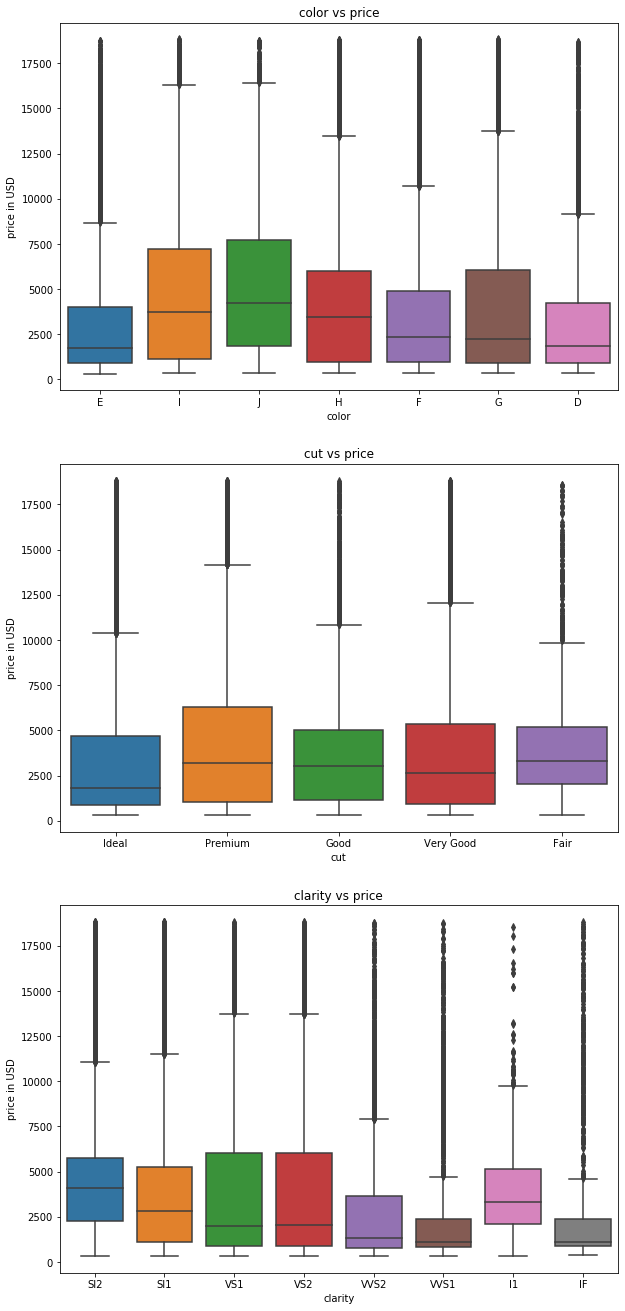

In [4]:
plt.figure(figsize=(10,23))
plt.subplot(3,1,1)
sns.boxplot(color,price)
plt.ylabel('price in USD')
plt.title('color vs price')

plt.subplot(3,1,2)
sns.boxplot(cut,price)
plt.ylabel('price in USD')
plt.title('cut vs price')

plt.subplot(3,1,3)
sns.boxplot(clarity,price)
plt.ylabel('price in USD')
plt.title('clarity vs price')



Next, I plotted to display the effect of volume and carat on price. I used plt.xlim and .ylim to adjust the x and y-axis. I also included a line of best fit on carat vs price and volume vs price using np.polyfit a function imported from NumPy.

[-6.91569458e-05  9.38572450e-02  8.15072814e+01 -1.84619225e+03]
[ -132.82862456  1775.72038352 -8238.52149585 14877.20330109
 -7548.28635478  4693.31730675  -418.55653483]


Text(0.5, 1.0, 'carat vs price')

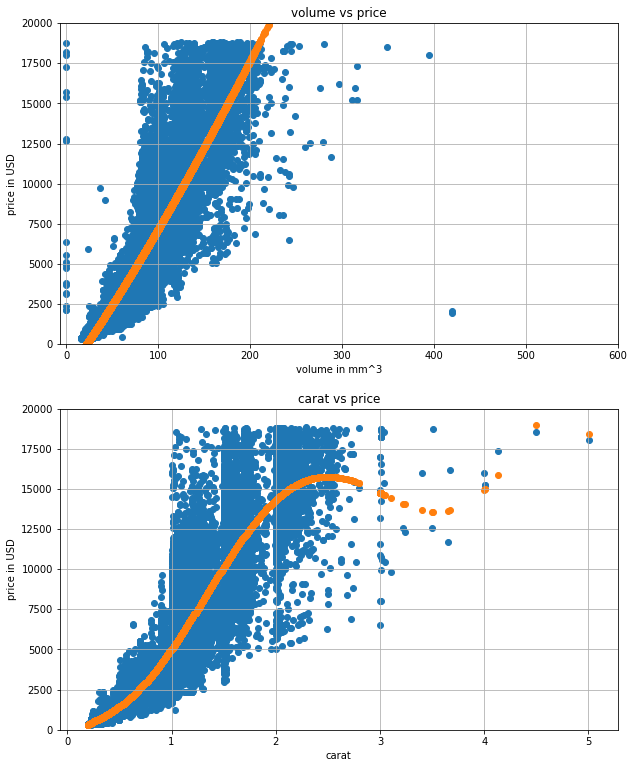

In [5]:
# plots of price on y axis vs quantitative variables  

plt.figure(figsize=(10,13))

para1 = np.polyfit(volume,price,3)  # prediciotns 
print(para1)

my_polyunction1 = np.poly1d(para1)
exp_polyfuncitony1 = my_polyunction1(volume)

plt.subplot(2,1,1)
plt.scatter(volume,price) # voluem vs price
plt.scatter(volume,exp_polyfuncitony1) # predicted line 
plt.xlim(-7,600)
plt.ylim(0,20000)
plt.grid()
plt.xlabel('volume in mm^3')
plt.ylabel('price in USD')
plt.title('volume vs price')

para = np.polyfit(carat,price,6)  # prediciotns 
print(para)

my_polyunction = np.poly1d(para)
exp_polyfuncitony = my_polyunction(carat)


plt.subplot(2,1,2)
plt.scatter(carat,price) # carat vs price 
plt.scatter(carat,exp_polyfuncitony) # predicted line 
plt.ylim(0,20000)
plt.grid()
plt.xlabel('carat')
plt.ylabel('price in USD')
plt.title('carat vs price')

In the cell below I preformed a linear regression of price regressed on volume, carat, color, clarity, and cut. The reason for this was to collect the coefficents from each variables to make a regression equations that will be used to predict the price of a diamond given volume, carat, color, clarity, and cut. I used the ols function with in the statsmodels.formula.api imported as smf. This function was very helpful in runing a regression to obtin wanted coefficeints. 

In [12]:
# regression 

# not a good regression suffers from strong multicollinearity or other numerical problems
# and Standard Errors assume that the covariance matrix of the errors is correctly specified.
# as shown in the warning below 

model = smf.ols(formula='price ~ volume+carat+color+clarity+cut', data=df).fit() # regressing price on everyhting else

summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.093e+04
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:49:44   Log-Likelihood:            -4.5699e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53920   BIC:                         9.142e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7356.6938     51.712   -142.261      0.000   -7458.051   -7255.337
color[T.E]        -211.9140     18.314    -11.571      0.000    -247.810    -176.018
color[T.F]        -303.3505     18.508    -16.390      0.000    -339.626    -267.075
color[T.G]        -506.0456     18.120    -27.927      0.000    -541.562    -470.530
color[T.H]        -978.8022     19.270    -50.794      0.000   -1016.572    -941.033
color[T.I]       -1440.1999     21.644    -66.539      0.000   -1482.623   -1397.777
color[T.J]       -2325.1904     26.720    -87.020      0.000   -2377.562   -2272.819
clarity[T.IF]     5416.9794     52.138    103.898      0.000    5314.789    5519.170
clarity[T.SI1]    3571.4551     44.599     80.080      0.000    3484.041    3658.869
clarity[T.SI2]    2623.5010     44.790     58.573      0.000    2535.711    2711.291
clarity[T.VS1]    4532.1701     45.538     99.524      0.000    4442.914    4621.426
clarity[T.VS2]    4215.5700     44.843     94.008      0.000    4127.678    4303.462
clarity[T.VVS1]   5069.6684     48.212    105.154      0.000    4975.173    5164.164
clarity[T.VVS2]   4964.6895     46.893    105.874      0.000    4872.780    5056.599
cut[T.Good]        652.9872     33.642     19.410      0.000     587.049     718.925
cut[T.Ideal]       992.8232     30.698     32.342      0.000     932.655    1052.991
cut[T.Premium]     864.8012     30.960     27.933      0.000     804.120     925.483
cut[T.Very Good]   844.3708     31.302     26.975      0.000     783.018     905.723
volume               1.9410      0.590      3.290      0.001       0.785       3.097
carat             8729.2631     49.168    177.541      0.000    8632.894    8825.632
==============================================================================
Omnibus:                    15285.217   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182901.671
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                      11.786   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, I made a function called appraisal to predict the price of a diamond given, carat, volume, color, cut, and clarity. I use the linear regression that was previously discussed along with .params and loops. The function .params pull individual coefficients from the OLS regression. I used if and elif statements to adjust the beta's for each input. Then I created a regression equation PP to calculated price along with returning P which is a print statement of PP.

In [13]:
# not accurte because of errors in regression, there are also much bette ways to do this

def appraisal(caratD,volumeD,colorD,cutD,clarityD):
    
    model = smf.ols(formula='price ~ volume+carat+color+clarity+cut', data=df).fit()
    
    beta0 = model.params[0] # interncept

    beta1 = model.params[19] # carat
    
    beta2 = model.params[18] # volume
    
    # color loops 
    
    if colorD == 'T.E':
        colorD = 1
        beta3 = model.params[1]
    elif colorD == 'T.F':
        colorD = 1
        beta3 = model.params[2]
    elif colorD == 'T.G':
        colorD = 1
        beta3 = model.params[3]
    elif colorD == 'T.H':
        colorD = 1
        beta3 = model.params[4]
    elif colorD == 'T.I':
        colorD = 1
        beta3 = model.params[5]
    elif colorD == 'T.J':
        colorD = 1
        beta3 = model.params[6]
        
    # clarity loops 
    
    if clarityD == 'T.IF':
        clarityD = 1
        beta4 = model.params[7]
    elif clarityD == 'T.SI1':
        clarityD = 1
        beta4 = model.params[8]
    elif clarityD == 'T.SI2':
        clarityD = 1
        beta4 = model.params[9]
    elif clarityD =='T.VS1':
        clarityD = 1
        beta4 = model.params[10]
    elif clarityD =='T.VS2':
        clarityD = 1
        beta4 = model.params[11]
    elif clarityD =='T.VVS1':
        clarityD = 1
        beta4 = model.params[12]
    elif clarityD =='T.VVS2':
        clarityD = 1
        beta4 = model.params[13]
        
    # cut loops 
    if cutD == 'T.Good':
        cutD = 1 
        beta5 = model.params[14]
    elif cutD == 'T.Ideal':
        cutD = 1 
        beta5 = model.params[15]
    elif cutD == 'T.Premium':
        cutD = 1 
        beta5 = model.params[16]
    elif cutD == 'T.Very Good':
        cutD = 1 
        beta5 = model.params[17]
    
    
    pp = beta0 + (beta1*caratD) + (beta2*volumeD) + (beta3*colorD) + (beta4*clarityD) +(beta5*cutD)
    
    P = print('the estimated cost of your diamond is',pp.round(2),'USD')
    
    return P

In [14]:
appraisal(1.54,100,'T.I','T.Premium','T.SI2')

the estimated cost of your diamond is 8328.57 USD


## Results

[-6.91569458e-05  9.38572450e-02  8.15072814e+01 -1.84619225e+03]
[ -132.82862456  1775.72038352 -8238.52149585 14877.20330109
 -7548.28635478  4693.31730675  -418.55653483]


Text(0.5, 1.0, 'carat vs price')

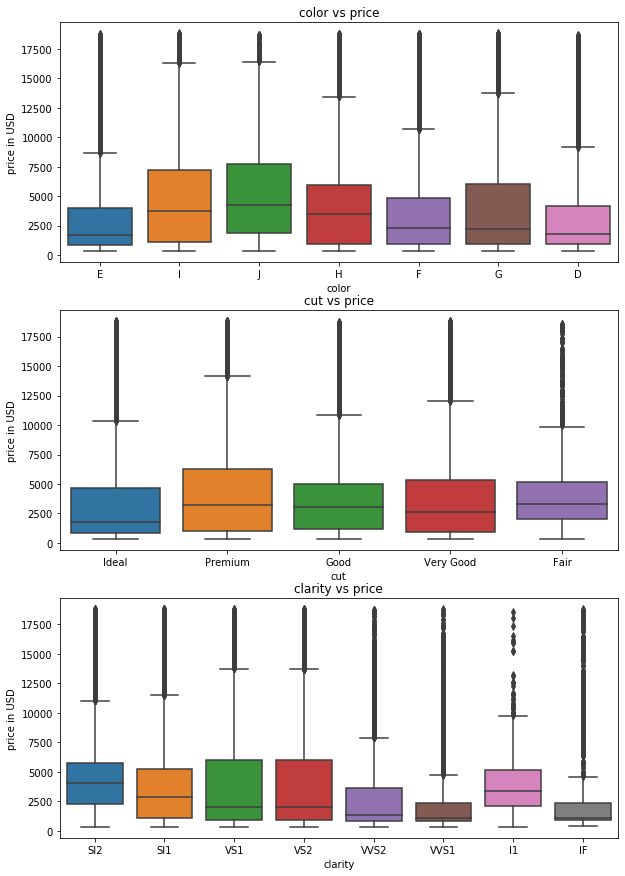

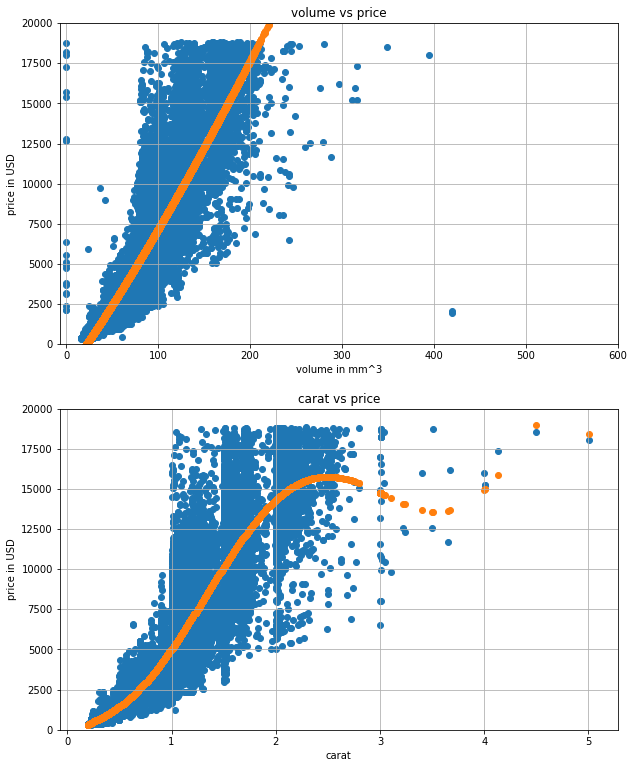

In [15]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.boxplot(color,price)
plt.ylabel('price in USD')
plt.title('color vs price')

plt.subplot(3,1,2)
sns.boxplot(cut,price)
plt.ylabel('price in USD')
plt.title('cut vs price')

plt.subplot(3,1,3)
sns.boxplot(clarity,price)
plt.ylabel('price in USD')
plt.title('clarity vs price')


plt.figure(figsize=(10,13))

para1 = np.polyfit(volume,price,3)  # prediciotns 
print(para1)

my_polyunction1 = np.poly1d(para1)
exp_polyfuncitony1 = my_polyunction1(volume)

plt.subplot(2,1,1)
plt.scatter(volume,price) # voluem vs price
plt.scatter(volume,exp_polyfuncitony1) # predicted line 
plt.xlim(-7,600)
plt.ylim(0,20000)
plt.grid()
plt.xlabel('volume in mm^3')
plt.ylabel('price in USD')
plt.title('volume vs price')

para = np.polyfit(carat,price,6)  # prediciotns 
print(para)

my_polyunction = np.poly1d(para)
exp_polyfuncitony = my_polyunction(carat)


plt.subplot(2,1,2)
plt.scatter(carat,price) # carat vs price 
plt.scatter(carat,exp_polyfuncitony) # predicted line 
plt.ylim(0,20000)
plt.grid()
plt.xlabel('carat')
plt.ylabel('price in USD')
plt.title('carat vs price')

The graphs above show the effect of clarity, cut, and color vs price. The box in whisker plot color vs price shows diamond color J has the highest average price and max price. In the box and whisker plot cut vs price premium cut diamonds have the highest average price and max price. In the box and whisker plot, clarity vs price a diamond clarity of SI2 has the highest average price but diamond clarity VS1 and VS2 have the highest max price. The graph of carat vs price shows that as carat increases there is an increase in price with a direct correlation. The graph of volume vs price shows that as volume increase there is an increase in price with a direct correlation. 

## Discussion and Conclusion

From the results, I have learned that there is a direct correlation between the size of a diamond and its price. Size represents volume and carat. I used a 6th-degree polynomial fit for carat vs price which shows a direct correlation between price and carat with a slight dip around 2.5-3.8 carats suggesting other factors affect the price. The plot volume vs price shows a direct correlation with an increase in volume and price with only on outlier at 420 mm^3. Volume is not the best way to predict price because as you can see there is some diamond with a volume close to zero with a price range of 2500 - 18500 USD. The box and whisker plots show the mean price and max price vary suggesting it must be a combination of color, cut, clarity, carat, and volume to determine the price. The regression analysis of price regressed on volume, carat, color, clarity, and cut showed that carat of a diamond has the largest effect on price with a beta coefficient of 8729.2631. The volume of a diamond has the smallest effect on price with a beta of 1.9410. The linear regression suggests all colors have a negative effect on price but color E with a beta of -211.9140 has the smallest effect on price with respect to color. An ideal cut diamond is the best for the price with a beta of 992.8232. The clarity of a diamond had the second-largest effect with clarity IF having a beta of 5416.9794. The beta means that if a diamond has that characters such as clarity IF it will have a price increase of 5416.9794. For example, a diamond with a carat of 2 would be 2*the beta coefficient for a carat which is  8729.2631. 

### References

Shivamagrawal. (2017, May 25). Diamonds. Retrieved from https://www.kaggle.com/shivam2503/diamonds

